### Nama    : Innama Maesa Putri
### Kelas   : TI - 3F
### Absen   : 16
### Studi Kasus 1- House Price Clustering

# Pra Pengolahan Data

### Load Dataset

In [1]:
import pandas as pd

df = pd.read_csv('dataset/1_house_prince_advance.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

### Drop kolom "Id" dan "MSSubClass"

In [2]:
df = df.drop(columns=['Id', 'MSSubClass'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       2915 non-null   object 
 1   LotFrontage    2433 non-null   float64
 2   LotArea        2919 non-null   int64  
 3   Street         2919 non-null   object 
 4   Alley          198 non-null    object 
 5   LotShape       2919 non-null   object 
 6   LandContour    2919 non-null   object 
 7   Utilities      2917 non-null   object 
 8   LotConfig      2919 non-null   object 
 9   LandSlope      2919 non-null   object 
 10  Neighborhood   2919 non-null   object 
 11  Condition1     2919 non-null   object 
 12  Condition2     2919 non-null   object 
 13  BldgType       2919 non-null   object 
 14  HouseStyle     2919 non-null   object 
 15  OverallQual    2919 non-null   int64  
 16  OverallCond    2919 non-null   int64  
 17  YearBuilt      2919 non-null   int64  
 18  YearRemo

### Drop semua variabel kualitatif

In [3]:
cat_col = df.select_dtypes(include=['object']).columns
df = df.drop(columns=cat_col)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    2433 non-null   float64
 1   LotArea        2919 non-null   int64  
 2   OverallQual    2919 non-null   int64  
 3   OverallCond    2919 non-null   int64  
 4   YearBuilt      2919 non-null   int64  
 5   YearRemodAdd   2919 non-null   int64  
 6   MasVnrArea     2896 non-null   float64
 7   BsmtFinSF1     2918 non-null   float64
 8   BsmtFinSF2     2918 non-null   float64
 9   BsmtUnfSF      2918 non-null   float64
 10  TotalBsmtSF    2918 non-null   float64
 11  1stFlrSF       2919 non-null   int64  
 12  2ndFlrSF       2919 non-null   int64  
 13  LowQualFinSF   2919 non-null   int64  
 14  GrLivArea      2919 non-null   int64  
 15  BsmtFullBath   2917 non-null   float64
 16  BsmtHalfBath   2917 non-null   float64
 17  FullBath       2919 non-null   int64  
 18  HalfBath

### Drop variabel dengan nilai kosong kurang dari 5

In [4]:
df.isnull().sum()

LotFrontage       486
LotArea             0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea         23
BsmtFinSF1          1
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        2
BsmtHalfBath        2
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageYrBlt       159
GarageCars          1
GarageArea          1
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SalePrice        1459
dtype: int64

In [5]:
kosong_kurang_dari_5 = df.columns[df.isnull().sum() < 5]
df = df.drop(columns=kosong_kurang_dari_5)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  2433 non-null   float64
 1   MasVnrArea   2896 non-null   float64
 2   GarageYrBlt  2760 non-null   float64
 3   SalePrice    1460 non-null   float64
dtypes: float64(4)
memory usage: 91.3 KB


### Data imputation pada data kosong

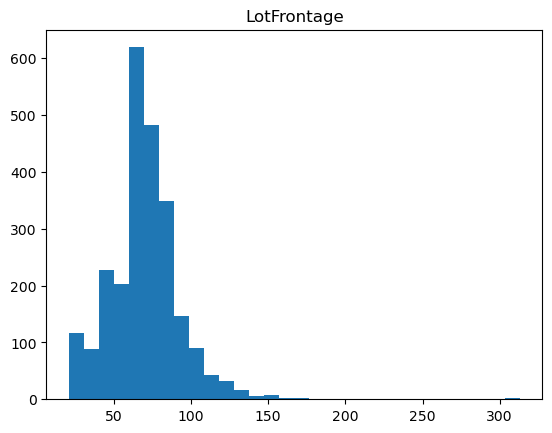

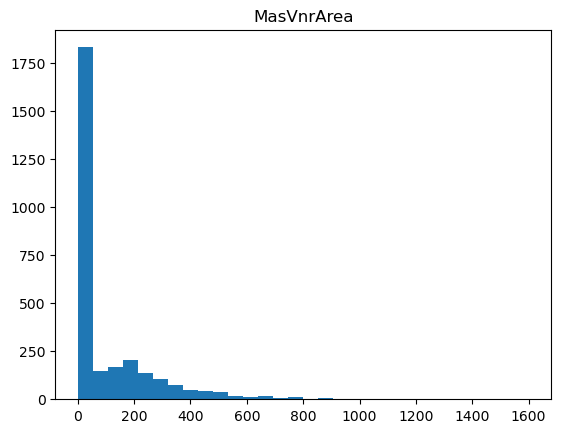

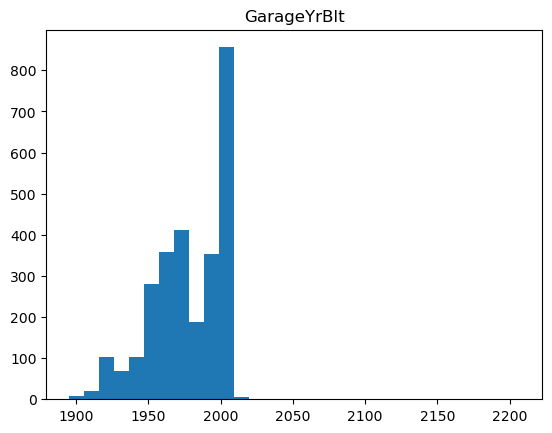

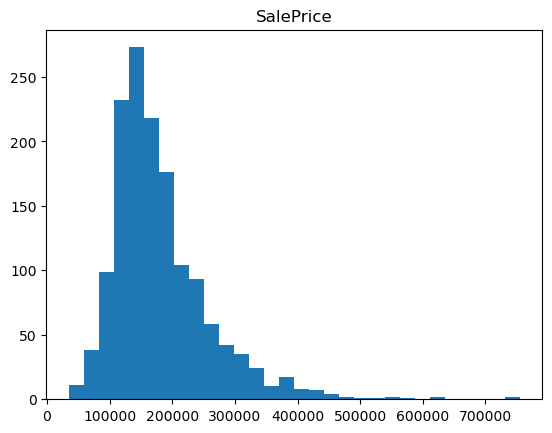

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in df.columns:
    plt.hist(df[col], bins=30)
    plt.title(col)
    plt.show()

- **LotFrontage** - Skewed ke kanan maka dilakukan imputation dengan median agar lebih tahan terhadap outlier.
- **MasVnrArea** - Skewed ekstrem ke kiri maka dilakukan imputation dengan modus karena terdapat satu nilai dominan dalam data.
- **GarageYrBlt** - Skewed ekstrem ke kanan maka dilakukan imputation dengan modus karena terdapat satu nilai dominan dalam data.
- **SalePrice** - Skewed ke kiri maka dilakukan imputation dengan median agar lebih tahan terhadap outlier.

In [7]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0])
df['SalePrice'] = df['SalePrice'].fillna(df['SalePrice'].median())
df.isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
SalePrice      0
dtype: int64

# Feature Selection

Disini saya merasa sedikit kesusahan karena yang tersisa dari proses prepocessing hanya ada 4 variabel, namun pada soal diperintahkan untuk menggunakan 10 variabel. Maka dari itu, di bagian ini akan saya lakukan proses prepocessing ulang

### Load dataset baru dan drop kolom tidak relevan

In [8]:
df2 = pd.read_csv('dataset/1_house_prince_advance.csv')
df2 = df2.drop(columns=['Id', 'MSSubClass'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       2915 non-null   object 
 1   LotFrontage    2433 non-null   float64
 2   LotArea        2919 non-null   int64  
 3   Street         2919 non-null   object 
 4   Alley          198 non-null    object 
 5   LotShape       2919 non-null   object 
 6   LandContour    2919 non-null   object 
 7   Utilities      2917 non-null   object 
 8   LotConfig      2919 non-null   object 
 9   LandSlope      2919 non-null   object 
 10  Neighborhood   2919 non-null   object 
 11  Condition1     2919 non-null   object 
 12  Condition2     2919 non-null   object 
 13  BldgType       2919 non-null   object 
 14  HouseStyle     2919 non-null   object 
 15  OverallQual    2919 non-null   int64  
 16  OverallCond    2919 non-null   int64  
 17  YearBuilt      2919 non-null   int64  
 18  YearRemo

### Melakukan prepocessing pada variabel numerik

Melakukan imputation

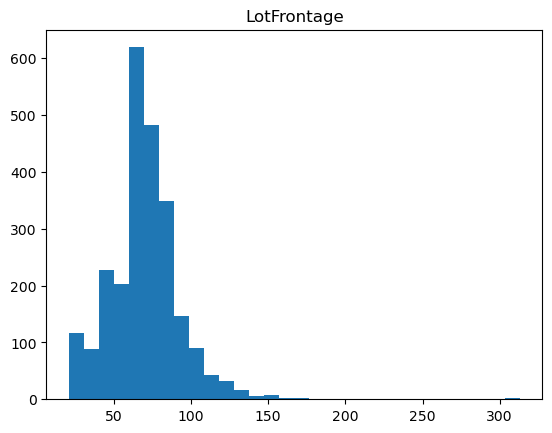

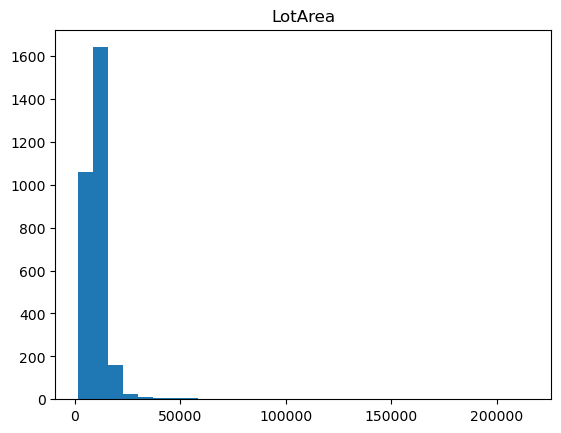

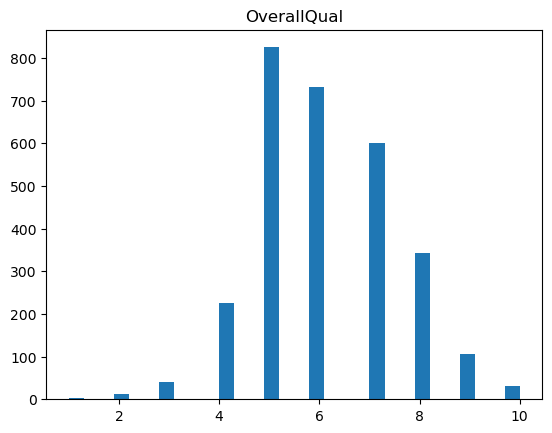

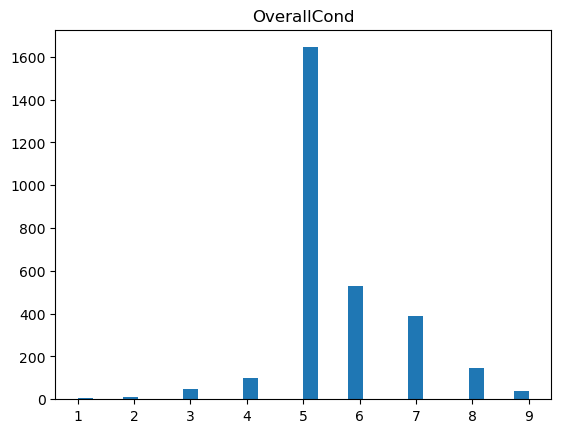

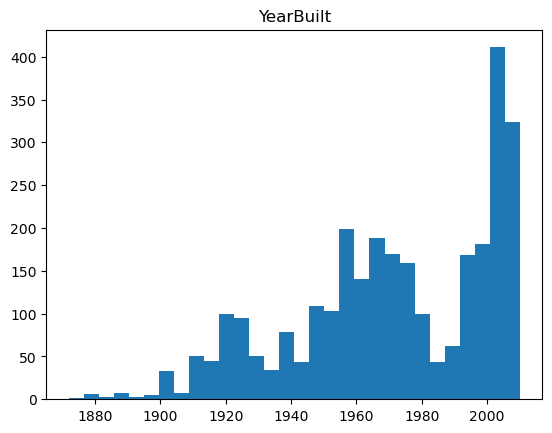

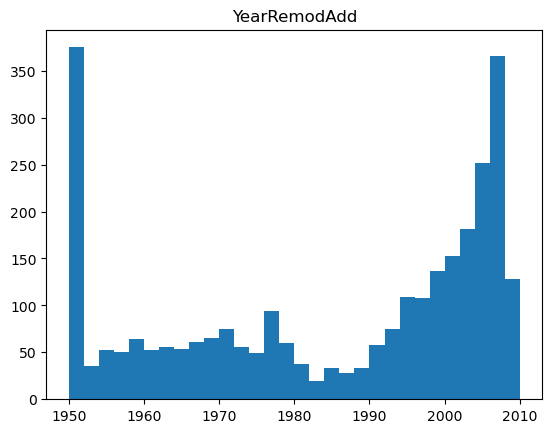

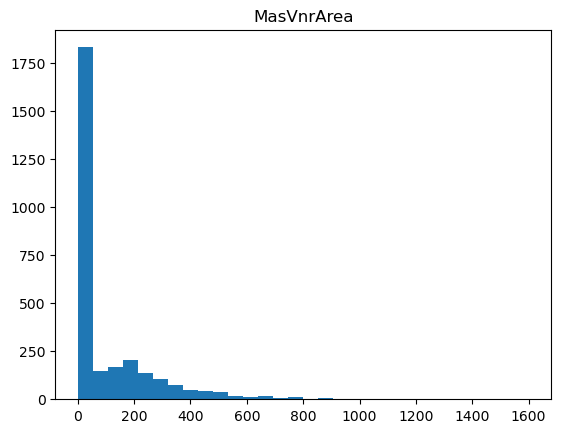

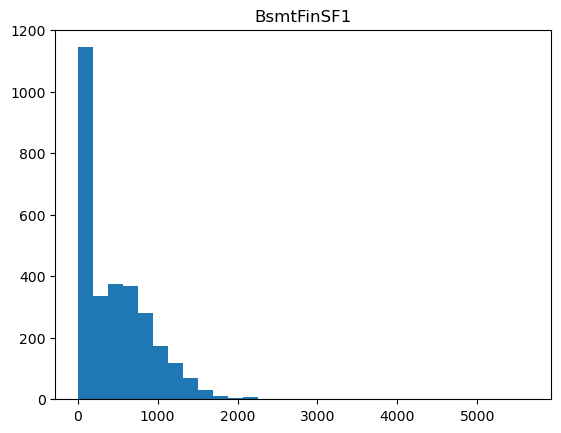

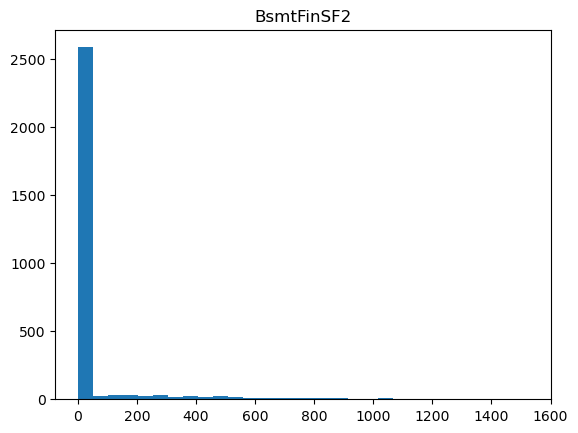

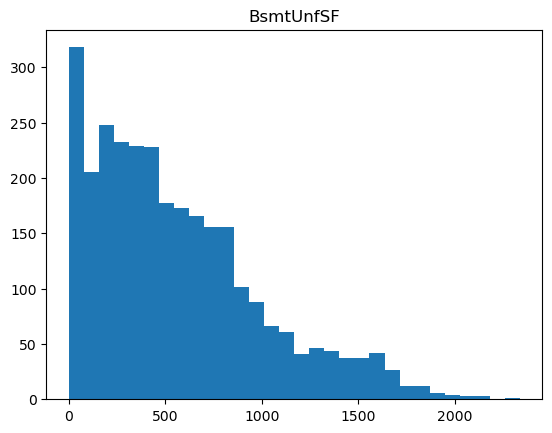

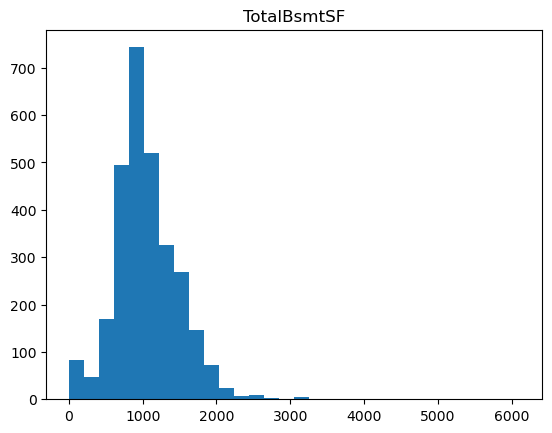

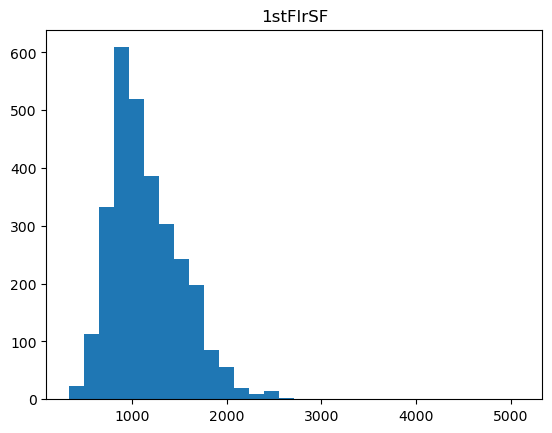

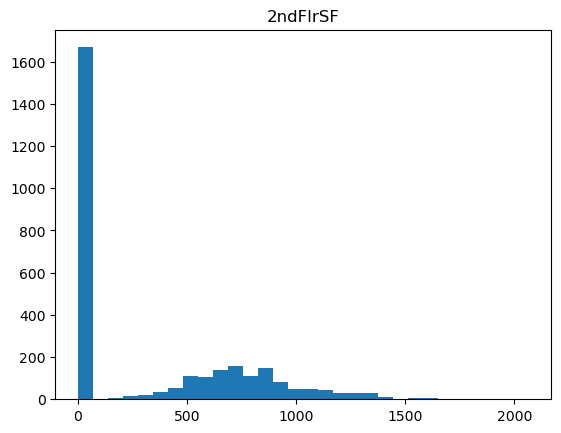

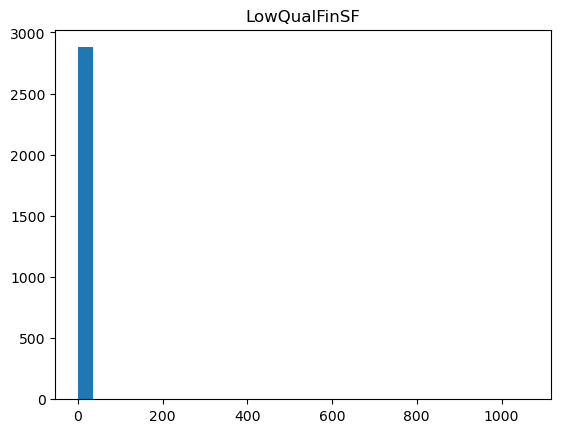

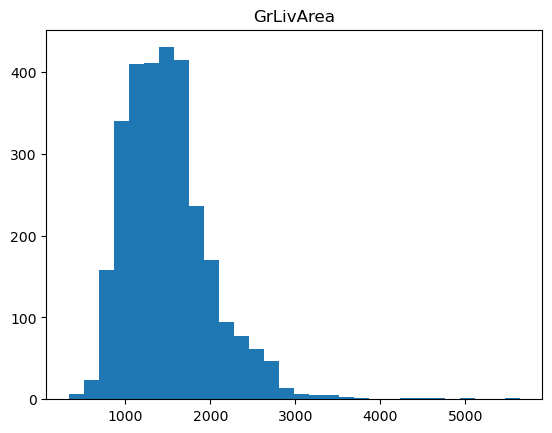

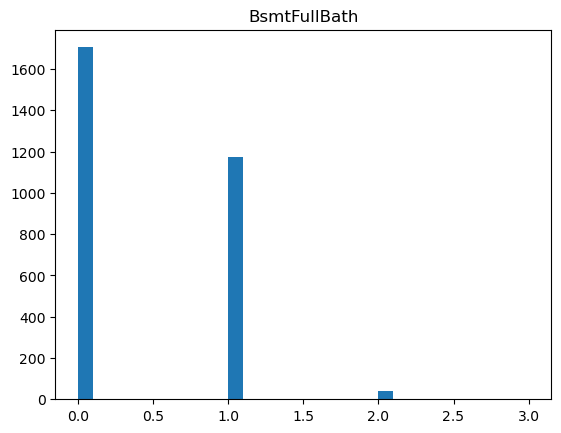

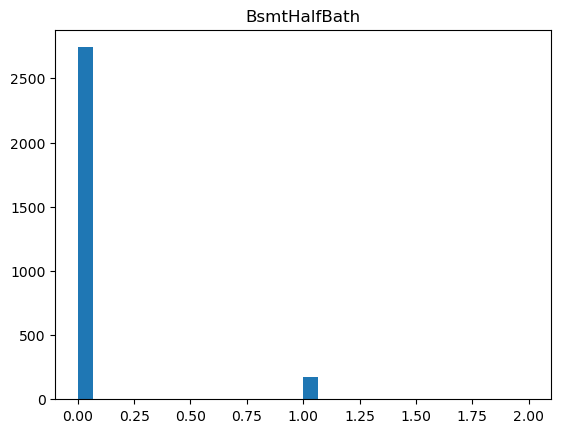

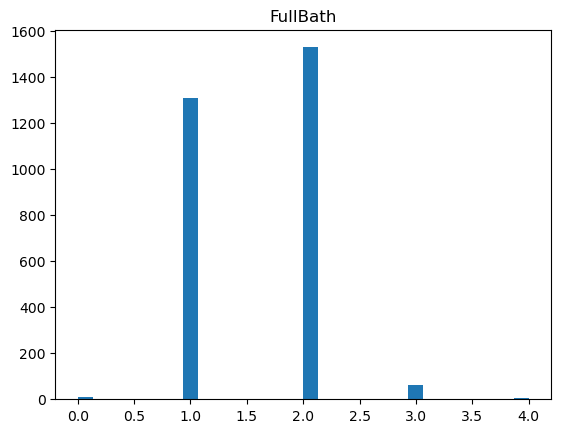

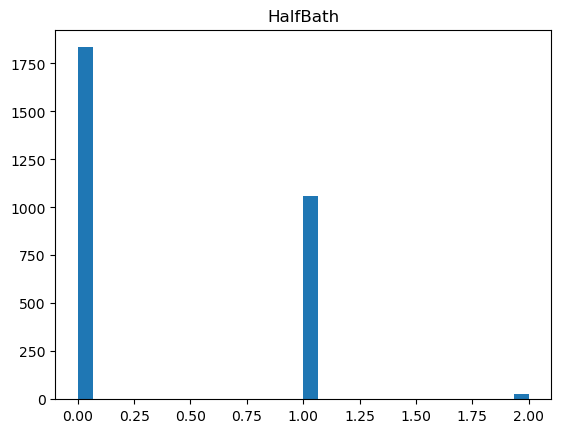

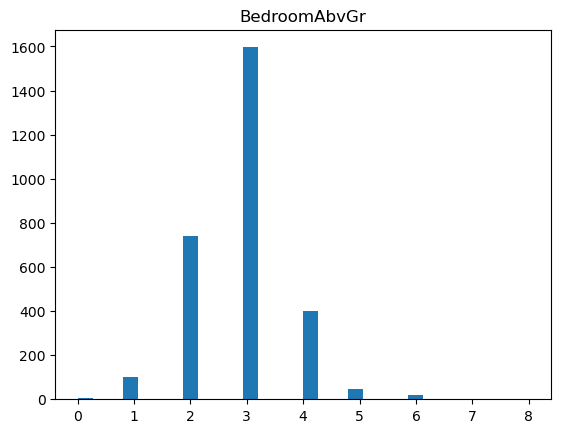

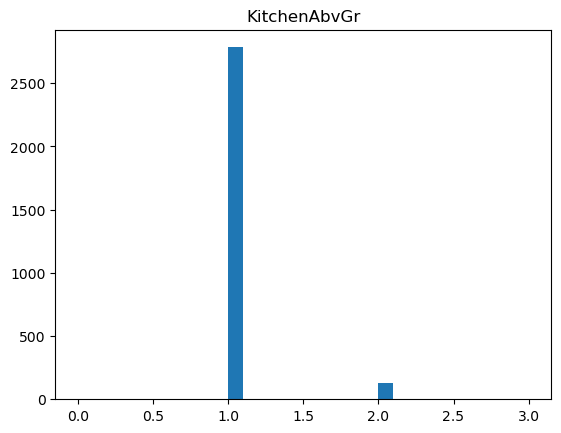

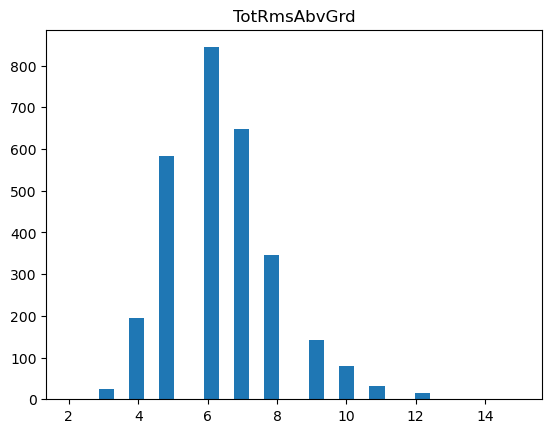

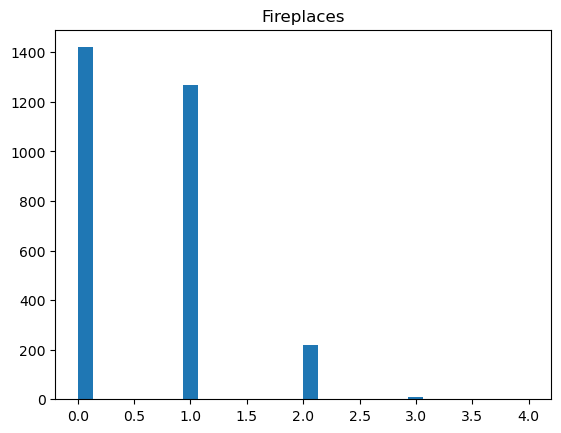

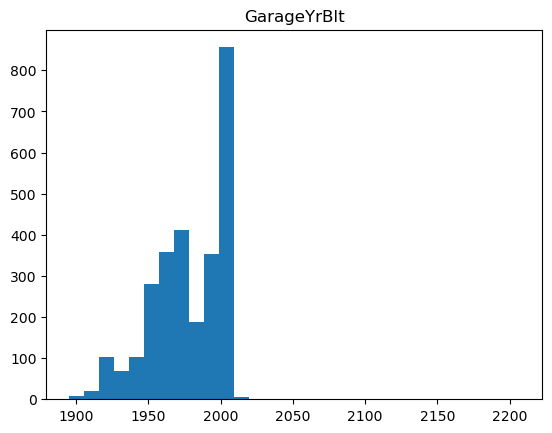

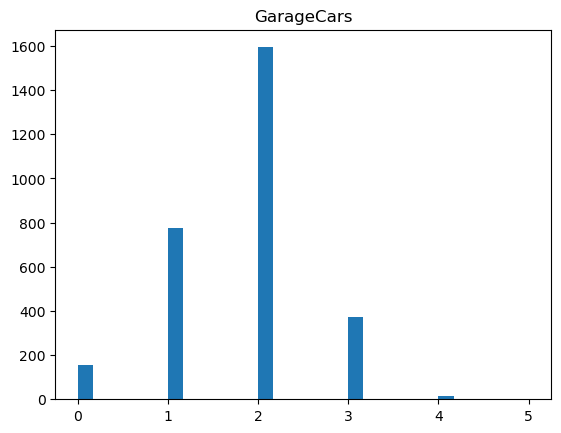

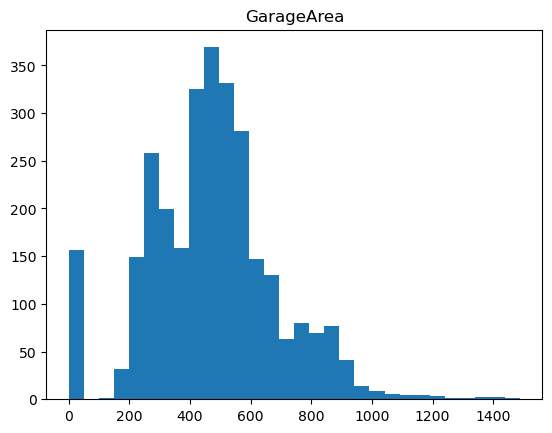

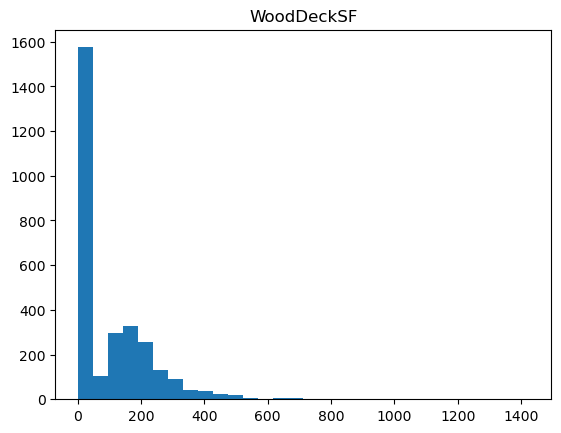

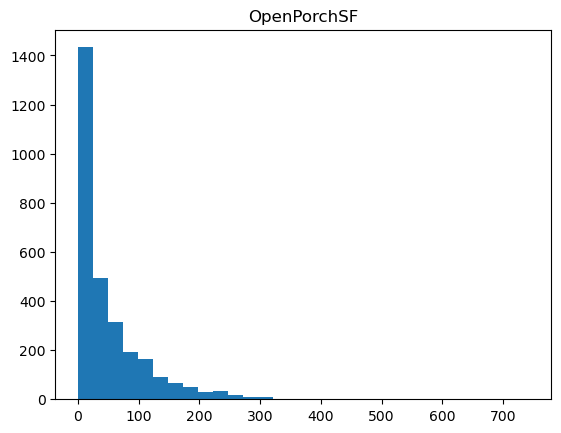

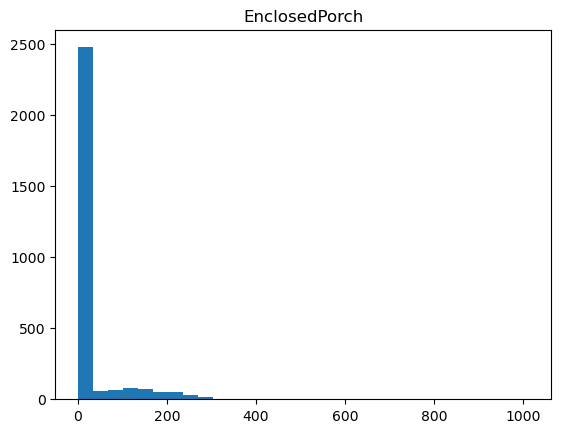

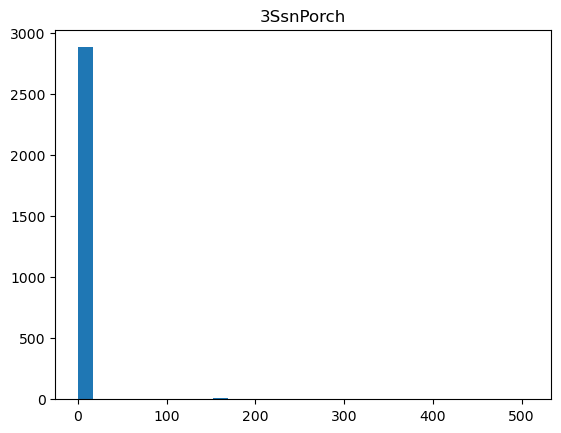

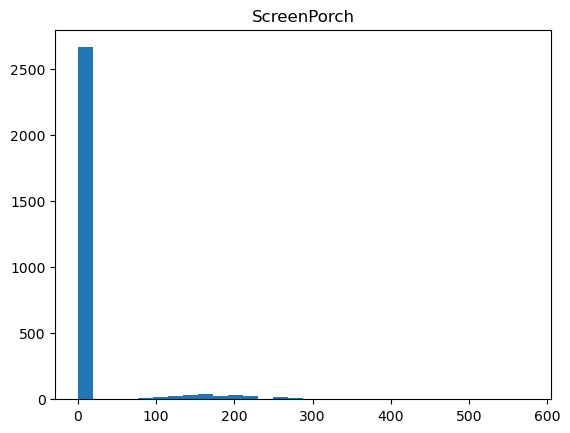

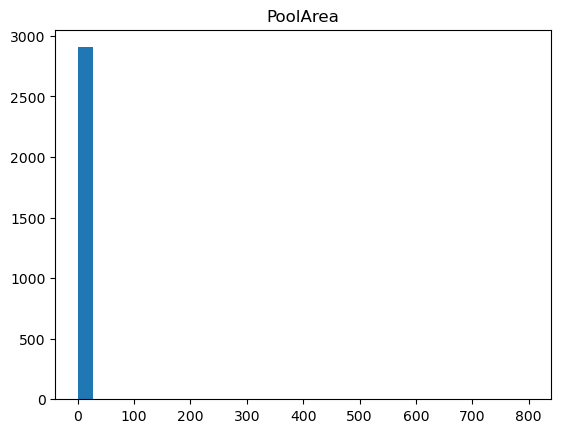

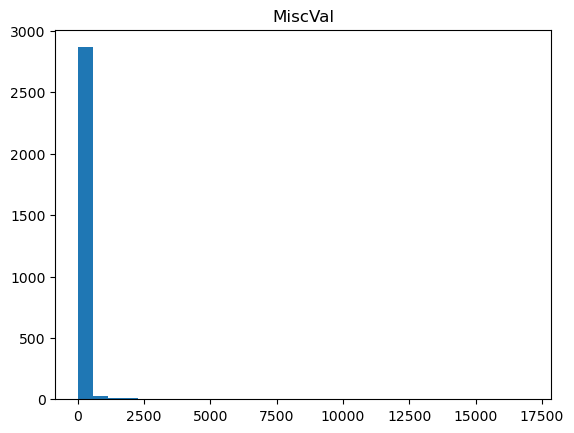

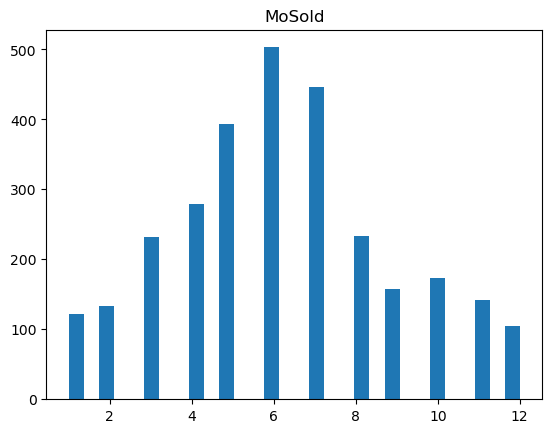

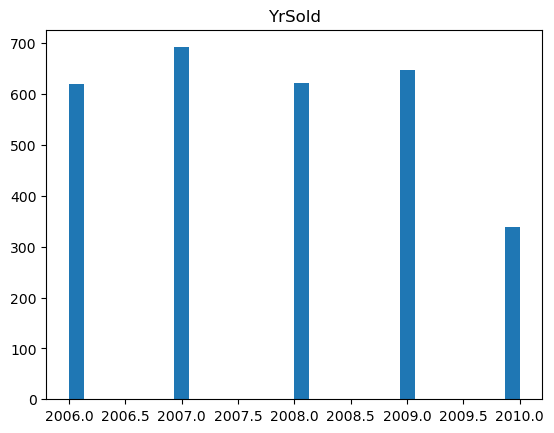

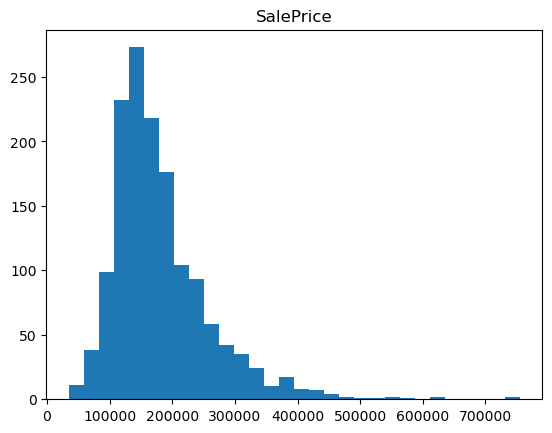

In [9]:
num_col = df2.select_dtypes(include=['int64', 'float64']).columns

for col in num_col:
    plt.hist(df2[col], bins=30)
    plt.title(col)
    plt.show()

Karena mayoritas penyebarannya tidak normal maka saya menggunakan modus dan beberapa menggunakan median

In [10]:
for col in num_col:
    if col in ['LotFrontage', 'SalePrice', 'GarageArea', 'GrLivArea', '1stFlrSF', 'TotalBsmtSF']:
        df2[col].fillna(df2[col].median(), inplace=True)
    else:
        df2[col].fillna(df2[col].mode()[0], inplace=True)

df2[num_col].isnull().sum()

C:\Users\innam\AppData\Local\Temp\ipykernel_13532\2790000671.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2[col].fillna(df2[col].median(), inplace=True)
C:\Users\innam\AppData\Local\Temp\ipykernel_13532\2790000671.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

### Melakukan prepocessing pada variabel kategorikal

Melakukan imputation

In [11]:
cat_col = df2.select_dtypes(include=['object']).columns

for col in cat_col:
    if df2[col].isnull().sum() > 0:
        df2[col].fillna(df2[col].mode()[0], inplace=True)

df2[cat_col].isnull().sum()

C:\Users\innam\AppData\Local\Temp\ipykernel_13532\524065169.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2[col].fillna(df2[col].mode()[0], inplace=True)


MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

In [12]:
df2.head()

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,...,0,Ex,MnPrv,Shed,0,2,2008,WD,Normal,208500.0
1,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,...,0,Ex,MnPrv,Shed,0,5,2007,WD,Normal,181500.0
2,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,...,0,Ex,MnPrv,Shed,0,9,2008,WD,Normal,223500.0
3,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,...,0,Ex,MnPrv,Shed,0,2,2006,WD,Abnorml,140000.0
4,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,...,0,Ex,MnPrv,Shed,0,12,2008,WD,Normal,250000.0


Melakukan encoding

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in cat_col:
    df2[col] = le.fit_transform(df2[col])

df2.head()

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,3,65.0,8450,1,0,3,3,0,4,0,...,0,0,2,2,0,2,2008,8,4,208500.0
1,3,80.0,9600,1,0,3,3,0,2,0,...,0,0,2,2,0,5,2007,8,4,181500.0
2,3,68.0,11250,1,0,0,3,0,4,0,...,0,0,2,2,0,9,2008,8,4,223500.0
3,3,60.0,9550,1,0,0,3,0,0,0,...,0,0,2,2,0,2,2006,8,0,140000.0
4,3,84.0,14260,1,0,0,3,0,2,0,...,0,0,2,2,0,12,2008,8,4,250000.0


In [14]:
df2.head()

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,3,65.0,8450,1,0,3,3,0,4,0,...,0,0,2,2,0,2,2008,8,4,208500.0
1,3,80.0,9600,1,0,3,3,0,2,0,...,0,0,2,2,0,5,2007,8,4,181500.0
2,3,68.0,11250,1,0,0,3,0,4,0,...,0,0,2,2,0,9,2008,8,4,223500.0
3,3,60.0,9550,1,0,0,3,0,0,0,...,0,0,2,2,0,2,2006,8,0,140000.0
4,3,84.0,14260,1,0,0,3,0,2,0,...,0,0,2,2,0,12,2008,8,4,250000.0


### Melakukan standarisasi

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df2[num_col] = scaler.fit_transform(df2[num_col])
df2.head()

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,3,-0.191815,-0.217879,1,0,3,3,0,4,0,...,-0.06315,0,2,2,-0.089592,-1.552184,0.157646,8,4,0.642397
1,3,0.511940,-0.072044,1,0,3,3,0,2,0,...,-0.06315,0,2,2,-0.089592,-0.446925,-0.602962,8,4,0.167672
2,3,-0.051064,0.137197,1,0,0,3,0,4,0,...,-0.06315,0,2,2,-0.089592,1.026753,0.157646,8,4,0.906133
3,3,-0.426400,-0.078385,1,0,0,3,0,0,0,...,-0.06315,0,2,2,-0.089592,-1.552184,-1.363569,8,0,-0.561998
4,3,0.699608,0.518903,1,0,0,3,0,2,0,...,-0.06315,0,2,2,-0.089592,2.132012,0.157646,8,4,1.372067


### Memeriksa korelasi dengan SalePrice

In [16]:
corr_with_saleprice = df2.corr()['SalePrice'].sort_values(ascending=False)
print(corr_with_saleprice)

SalePrice       1.000000
OverallQual     0.542911
GrLivArea       0.518393
GarageCars      0.438936
GarageArea      0.432263
                  ...   
HeatingQC      -0.278532
GarageFinish   -0.372300
KitchenQual    -0.410720
BsmtQual       -0.417977
ExterQual      -0.437461
Name: SalePrice, Length: 79, dtype: float64


Karena kita mencari 10 variabel terbaik, disini saya menggunakan tingkat korelasi dengan kolom Sale Price

In [17]:
strong_corr = corr_with_saleprice[(corr_with_saleprice > 0.38) | (corr_with_saleprice < -0.38)]
print(strong_corr)

SalePrice       1.000000
OverallQual     0.542911
GrLivArea       0.518393
GarageCars      0.438936
GarageArea      0.432263
TotalBsmtSF     0.428546
1stFlrSF        0.418049
TotRmsAbvGrd    0.392645
FullBath        0.389208
KitchenQual    -0.410720
BsmtQual       -0.417977
ExterQual      -0.437461
Name: SalePrice, dtype: float64


Disini, jika kita memilih variabel dengan korelasi terkuat terhadap Sale Price terdapat variabel yang memiliki korelasi positif dan negatif. Maka saya menetapkan nilai 0.38 sebagai batas kuat tidaknya korelasi. Dari proses tersebut saya memilih beberapa fitur seperti berikut : <br>
1. OverallQual
2. GrLivArea
3. GarageCars
4. GarageArea
5. TotalBsmtSF
6. 1stFlrSF
7. TotRmsAbvGrd
8. KitchenQual
9. BsmtQual
10. ExterQual

# Clustering 1

In [18]:
selected_features = df2[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'SalePrice']]

selected_features.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,0.646183,0.413547,0.306418,0.348888,-0.444278,-0.773861,0.986849,1.046258,0.896833,0.642397
1,-0.063185,-0.471891,0.306418,-0.059804,0.477158,0.261075,-0.287758,0.154764,-0.395604,0.167672
2,0.646183,0.563755,0.306418,0.627542,-0.299027,-0.610718,-0.287758,0.980221,0.848965,0.906133
3,0.646183,0.427382,1.619830,0.785446,-0.671232,-0.506205,0.349546,-1.859351,-0.682812,-0.561998
4,1.355551,1.378042,1.619830,1.686426,0.211621,-0.037170,1.624153,0.947203,0.753229,1.372067


### Standarisasi data

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(selected_features)

X_scaled

array([[ 0.6461834 ,  0.41354722,  0.30641785, ...,  1.0462576 ,
         0.89683293,  0.64239693],
       [-0.06318454, -0.47189065,  0.30641785, ...,  0.154764  ,
        -0.39560419,  0.16767174],
       [ 0.6461834 ,  0.56375543,  0.30641785, ...,  0.98022103,
         0.84896489,  0.90613314],
       ...,
       [-0.77255247, -0.54699476,  0.30641785, ..., -0.3735285 ,
         0.56175664, -0.15760292],
       [-0.77255247, -1.0490064 , -2.32040652, ...,  0.6830565 ,
         0.37028447, -0.15760292],
       [ 0.6461834 ,  0.98671012,  1.61983003, ...,  0.71607478,
         0.46602056, -0.15760292]])

### Pembuatan model cluster menggunakan KMeans dengan jumlah 1 hingga 10

In [20]:
from sklearn.cluster import KMeans

for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    inertia = kmeans.inertia_
    print(f'Number of clusters: {n_clusters}, Inertia: {inertia}')

c:\Users\innam\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\innam\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\innam\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\innam\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

Number of clusters: 1, Inertia: 29190.000000000004
Number of clusters: 2, Inertia: 19614.192203701576
Number of clusters: 3, Inertia: 16573.176371742793
Number of clusters: 4, Inertia: 15065.28973050118
Number of clusters: 5, Inertia: 13993.436722036873
Number of clusters: 6, Inertia: 13036.606922528164
Number of clusters: 7, Inertia: 12624.006172145264
Number of clusters: 8, Inertia: 11493.439198303646
Number of clusters: 9, Inertia: 10999.014137504044
Number of clusters: 10, Inertia: 10610.21651872401


### Buat diagram elbow

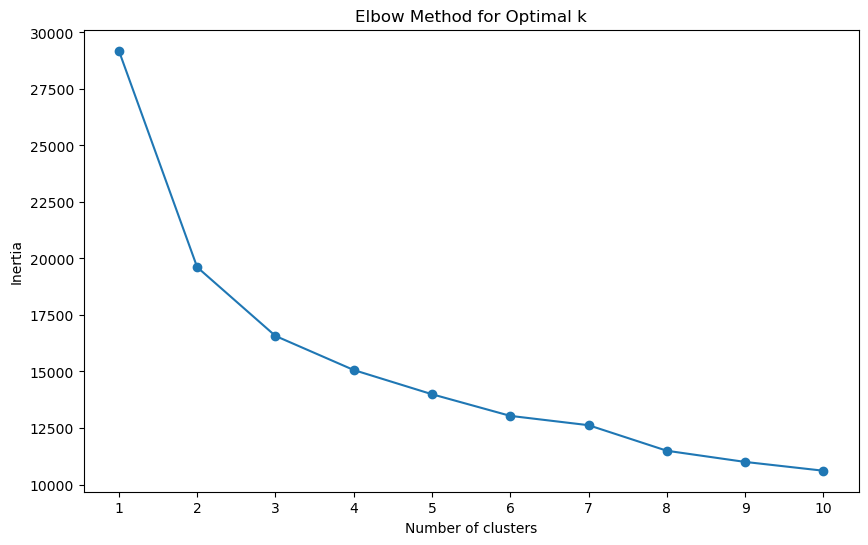

In [21]:
plt.figure(figsize=(10, 6))
inertia_values = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.show()

### Menghitung silhouette coeficient

In [22]:
from sklearn.metrics import silhouette_score

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f'Number of clusters: {n_clusters}, Silhouette Score: {silhouette_avg}')


Number of clusters: 2, Silhouette Score: 0.2868252747862487
Number of clusters: 3, Silhouette Score: 0.22184175698870404
Number of clusters: 4, Silhouette Score: 0.1923861949572922
Number of clusters: 5, Silhouette Score: 0.17941490365158794
Number of clusters: 6, Silhouette Score: 0.18288179497756707
Number of clusters: 7, Silhouette Score: 0.18301924382974535
Number of clusters: 8, Silhouette Score: 0.19485663670184247
Number of clusters: 9, Silhouette Score: 0.20061326509912134
Number of clusters: 10, Silhouette Score: 0.1854341065930853


Jika dibandingkan antara nilai silhouette dan K-elbow, terdapat perbedaan jika menggunakan K-Elbow jumlah cluster yang paling baik adalah 3. Namun jika menggunakan nilai silhoutte maka yang paling baik adalah 2 cluster karena nilai tersebut yang mendekati 1. Namun, dalam hal ini saya meilih jumlah cluster = 3 karena terkadang nilai silhouette tidak dapat mendeskripsikan bentuk cluster secara keseluruhan.

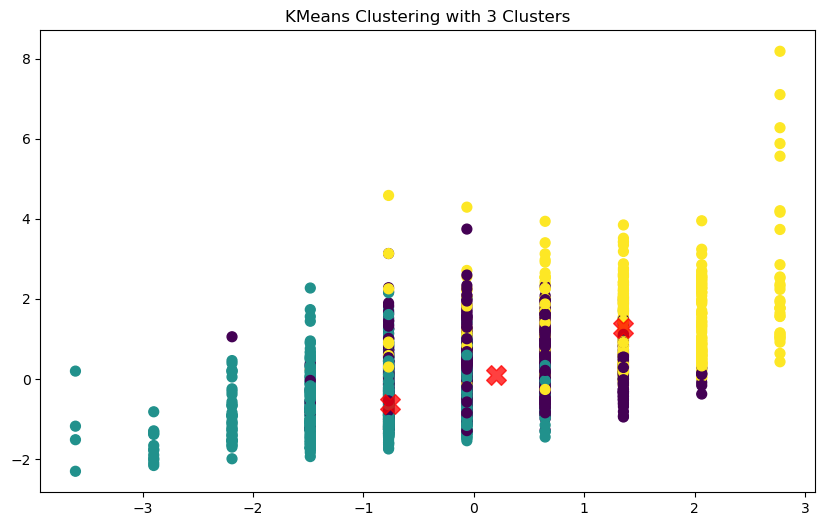

In [23]:
cl_kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = cl_kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('KMeans Clustering with 3 Clusters')
plt.show()

# Clustering 2

### Pembuatan model cluster dengan DBSCAN

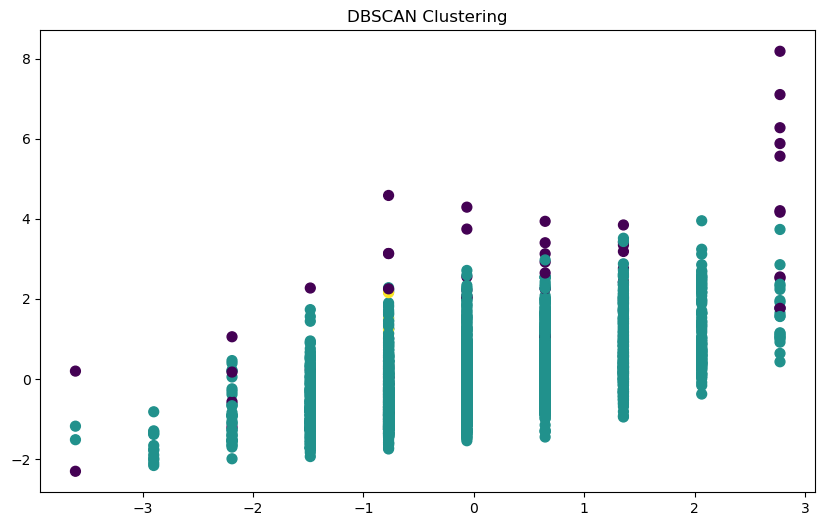

In [24]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=2, min_samples=3)
cluster_db = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_db, s=50, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()

In [25]:
print("Jumlah cluster DBSCAN:", len(set(cluster_db)) - (1 if -1 in cluster_db else 0))

Jumlah cluster DBSCAN: 2


### Menghitung silhoutte coeficient dan DBI

In [26]:
print("Silhoutte DBSCAN:", silhouette_score(X_scaled, cluster_db))

from sklearn.metrics import davies_bouldin_score
print("DBI DBSCAN:", davies_bouldin_score(X_scaled, cluster_db))

Silhoutte DBSCAN: 0.319847234478711
DBI DBSCAN: 1.7310769619614532


Saya menggunakan model diatas karena menurut saya menghasilkan kluster yang hampir sama dengan yang dihasilkan oleh kmeans, kekurangannya adalah nilai dbi nya yang cukup tinggi. terdapat juga beberapa model yang nilai dbi nya lebih rendah namun silhoutte nya kurang dari 0 dan jumlah cluster nya melenceng jauh dari kmeans.

# BONUS - CHALLENGE

In [ ]:
df3 = pd.read_csv('dataset/1_house_prince_advance.csv')
df3 = df3.drop(columns=['Id', 'MSSubClass'])
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       2915 non-null   object 
 1   LotFrontage    2433 non-null   float64
 2   LotArea        2919 non-null   int64  
 3   Street         2919 non-null   object 
 4   Alley          198 non-null    object 
 5   LotShape       2919 non-null   object 
 6   LandContour    2919 non-null   object 
 7   Utilities      2917 non-null   object 
 8   LotConfig      2919 non-null   object 
 9   LandSlope      2919 non-null   object 
 10  Neighborhood   2919 non-null   object 
 11  Condition1     2919 non-null   object 
 12  Condition2     2919 non-null   object 
 13  BldgType       2919 non-null   object 
 14  HouseStyle     2919 non-null   object 
 15  OverallQual    2919 non-null   int64  
 16  OverallCond    2919 non-null   int64  
 17  YearBuilt      2919 non-null   int64  
 18  YearRemo

Memilih filter meenggunakan random forest memberikan ranking terhadap kontribusi tiap fitur dalam proses prediksi, random forest juga tidak butuh proses scaling dan yang pasti menghemat waktu daripada harus iterative selection.

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

X = df3.drop(columns=['SalePrice'])  
y = df3['SalePrice']

le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col].astype(str))
        X[col] = X[col].fillna(X[col].mode()[0])
    else:
        X[col] = X[col].fillna(X[col].median())

y = y.fillna(y.median())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

selector = SelectFromModel(rf, threshold='median', prefit=True)  # ambil fitur di atas median importance
X_selected = selector.transform(X)

selected_features = X.columns[selector.get_support()]
print(f"Jumlah fitur awal: {X.shape[1]}")
print(f"Jumlah fitur terpilih: {X_selected.shape[1]}")
print("Fitur yang dipilih:")
print(selected_features)

Jumlah fitur awal: 78
Jumlah fitur terpilih: 39
Fitur yang dipilih:
Index(['LotFrontage', 'LotArea', 'LotShape', 'LotConfig', 'Neighborhood',
       'Condition1', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold', 'YrSold'],
      dtype='object')


c:\Users\innam\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [88]:
X_selected_scaled = scaler.fit_transform(X_selected)
X_selected_scaled

array([[-0.19181473, -0.21787869,  0.74666938, ..., -0.35960075,
        -1.55218353,  0.15764553],
       [ 0.51193993, -0.07204408,  0.74666938, ..., -0.35960075,
        -0.44692486, -0.60296158],
       [-0.0510638 ,  0.13719688, -1.38177585, ..., -0.35960075,
         1.02675338,  0.15764553],
       ...,
       [ 4.26529811,  1.24680804,  0.74666938, ..., -0.35960075,
         1.02675338, -1.36356868],
       [-0.33256567,  0.0346054 ,  0.74666938, ..., -0.35960075,
         0.28991426, -1.36356868],
       [ 0.23043806, -0.06862014,  0.74666938, ..., -0.35960075,
         1.7635925 , -1.36356868]])

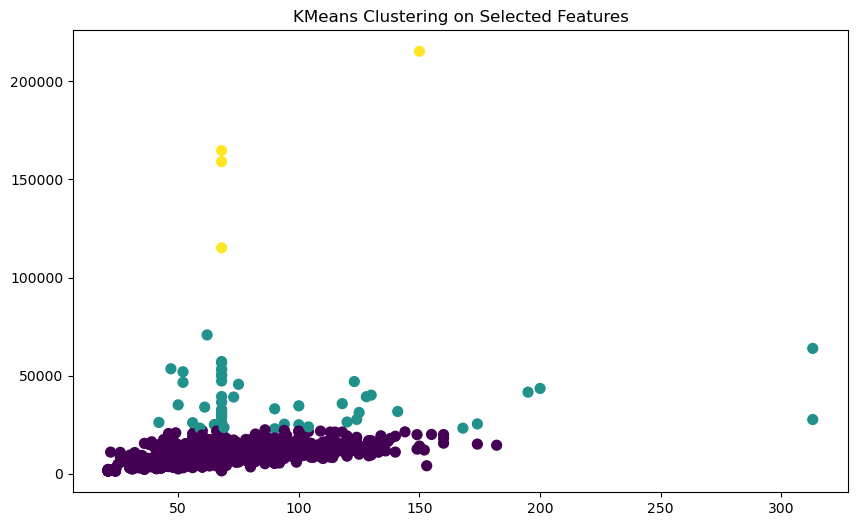

In [91]:
cl_kmeans2 = KMeans(n_clusters=3, random_state=42)
y_kmeans2 = cl_kmeans2.fit_predict(X_selected)

plt.figure(figsize=(10, 6))
plt.scatter(X_selected[:, 0], X_selected[:, 1], c=y_kmeans2, s=50, cmap='viridis')
plt.title('KMeans Clustering on Selected Features')
plt.show()

In [92]:
silhouette_avg2 = silhouette_score(X_selected, y_kmeans2)
print(f'Silhouette Score after Feature Selection: {silhouette_avg2}')

Silhouette Score after Feature Selection: 0.8163778343720018


Nilai silhoutte lebih besar dibanding sebelumnya yang hanya menggunakan 10 fitur, dengan angka hampir mendekati 1, maka cluster terpisah dengan jelas. Namun jika menggunakan data scaled nilai nya akan menurun drastis

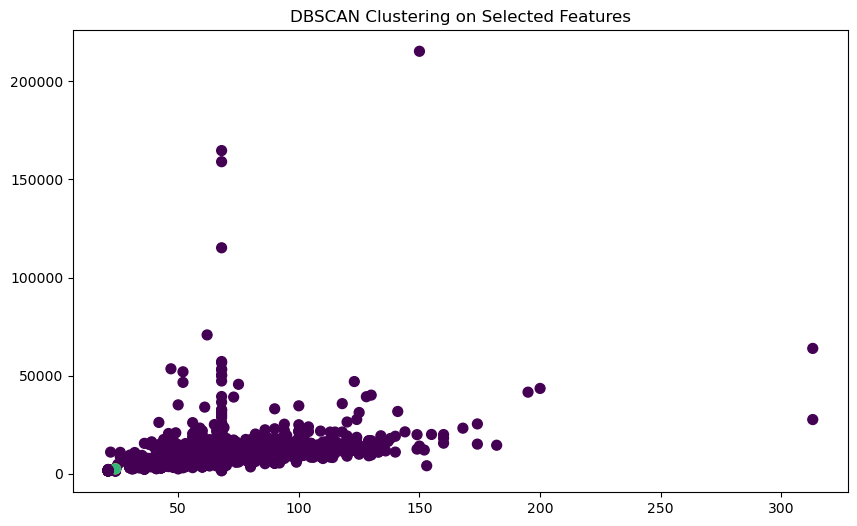

In [118]:
dbscan2 = DBSCAN(eps=0.5, min_samples=3)
cluster_db2 = dbscan2.fit_predict(X_selected_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_selected[:, 0], X_selected[:, 1], c=cluster_db2, s=50, cmap='viridis')
plt.title('DBSCAN Clustering on Selected Features')
plt.show()

In [119]:
print("Jumlah cluster DBSCAN setelah seleksi fitur:", len(set(cluster_db2)) - (1 if -1 in cluster_db2 else 0))

Jumlah cluster DBSCAN setelah seleksi fitur: 3


In [120]:
print("DBI DBSCAN setelah seleksi fitur:", davies_bouldin_score(X_selected, cluster_db2))
print("Sillhoutte DBSCAN setelah seleksi fitur:", silhouette_score(X_selected, cluster_db2))

DBI DBSCAN setelah seleksi fitur: 0.799268829570364
Sillhoutte DBSCAN setelah seleksi fitur: -0.25742200956250816


Sebaliknya, ketika memakai dbscan, paling baik adalah dengan menggunakan data yang telah di scale